<a href="https://colab.research.google.com/github/kunalgaurav18/CE888/blob/main/Lab_3/bank__classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
bank_df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv', sep=';')
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [110]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import SCORERS, accuracy_score as acc, f1_score as f1
from sklearn.dummy import DummyClassifier

In [10]:
le = LabelEncoder()
bank_df['y'] = le.fit_transform(bank_df['y'])

In [13]:
dummies = pd.get_dummies(bank_df)

In [15]:
dummies.drop('duration', axis=1, inplace=True)

In [112]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [20]:
dummies.isna().sum()

age                     0
campaign                0
pdays                   0
previous                0
emp.var.rate            0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 63, dtype: int64

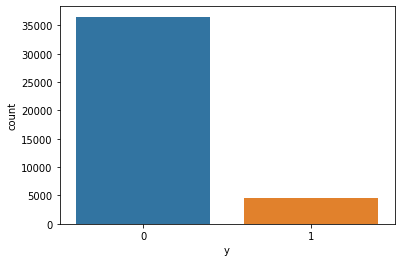

In [22]:
sns.countplot(data=dummies, x='y')

In [27]:
x = dummies.drop('y', axis=1)
y = dummies['y']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=50, test_size=0.2)

In [49]:
cv = StratifiedKFold(n_splits=10, random_state=50, shuffle=True)
clf = RandomForestClassifier(n_estimators=100, max_depth=3)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
scores = cross_val_score(clf, x_train, y_train, cv=cv, n_jobs=-1, scoring='accuracy', verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.0s finished


In [57]:
scores

array([0.89559939, 0.90227618, 0.89924127, 0.89256449, 0.89802731,
       0.90197269, 0.89559939, 0.89863429, 0.89802731, 0.89772382])

In [43]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [103]:
dummyClf = DummyClassifier(strategy='stratified')
dummyClf.fit(x_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [104]:
dummy_score = cross_val_score(dummyClf, x_train, y=y_train, scoring='f1', cv=10)
dummy_score.mean()

0.10840392795393597

In [59]:
acc(y_test, dummyClf.predict(x_test))

0.8014081087642632

In [60]:
acc(y_test, clf.predict(x_test))

0.8999757222626851

In [63]:
params = { 
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8, 10],
    'criterion' :['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, scoring='accuracy', n_jobs=-1, verbose=10)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  3

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [64]:
grid_search.best_score_

0.9007890743550835

In [66]:
scores_cv = cross_val_score(estimator=grid_search.best_estimator_, X=x_train, 
                            y=y_train, cv=cv, n_jobs=-1, scoring='accuracy', verbose=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.7s finished


In [67]:
scores_cv

array([0.89742033, 0.907739  , 0.90288316, 0.89317147, 0.90075873,
       0.90500759, 0.89924127, 0.89924127, 0.90015175, 0.89924127])

In [74]:
dummies['y'].value_counts().iloc[1]/dummies['y'].value_counts().sum()

0.11265417111780131

In [75]:
dummy_f1_score = cross_val_score(estimator=dummyClf, cv=cv, scoring='f1', X=x_train, y=y_train) 

In [78]:
dummies.shape

(41188, 63)

In [79]:
rfclf = RandomForestClassifier(n_estimators=150, max_depth=6)
score_rf = cross_val_score(rfclf, x_train, y=y_train, cv=cv, n_jobs=-1, scoring='f1')

In [81]:
score_rf.mean()

0.28098839775429163

In [113]:
rfclf = RandomForestClassifier(n_estimators=100, max_depth=3)
score_rf = cross_val_score(rfclf, x_train, y=y_train, cv=cv, n_jobs=-1, scoring='f1')
score_rf.mean()

0.24752863403665723

In [114]:
rfclf = RandomForestClassifier(n_estimators=250, max_depth=6)
score_rf = cross_val_score(rfclf, x_train, y=y_train, cv=cv, n_jobs=-1, scoring='f1')
score_rf.mean()

0.2825627697767509

In [115]:
rfclf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=60)
score_rf = cross_val_score(rfclf, x_train, y=y_train, cv=cv, n_jobs=-1, scoring='f1')
score_rf.mean()

0.32549833133979383

In [111]:
rfclf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=60)
rfclf.fit(x_train, y_train)
# score_rf = cross_val_score(rfclf, x_train, y=y_train, cv=cv, n_jobs=-1, scoring='f1')
# score_rf.mean()

pred = rfclf.predict(x_test)
f1(y_test, pred)

0.3105175292153589

In [116]:
rfclf = RandomForestClassifier(n_estimators=300, max_depth=12, random_state=60)
rfclf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=60, verbose=0,
                       warm_start=False)

In [117]:
importances = rfclf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfclf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

for f in range(x.shape[1]):
    print("%d. %s (%f)" % (f + 1, columns[indices[f]],  importances[indices[f]]))

[ 7  8  2 61  4  0  6  5  1  3 59 60 52 49 43 50 42 55 31 38 36 56 54 23
 57 22 44 28 58  9 39 10 14 41 18 30 27 48 17 33 21 34 25 53 16 32 13 26
 19 15 51 45 47 12 37 40 11 20 46 24 29 35]
1. euribor3m (0.137780)
2. nr.employed (0.116927)
3. pdays (0.074017)
4. poutcome_nonexistent (0.069784)
5. emp.var.rate (0.061363)
6. age (0.060166)
7. cons.conf.idx (0.055543)
8. cons.price.idx (0.048979)
9. campaign (0.026308)
10. previous (0.025351)
11. day_of_week_wed (0.016382)
12. poutcome_failure (0.014782)
13. month_nov (0.013438)
14. month_jun (0.012811)
15. contact_cellular (0.012810)
16. month_mar (0.012357)
17. loan_yes (0.012290)
18. day_of_week_fri (0.010371)
19. education_professional.course (0.009047)
20. housing_unknown (0.008521)
21. default_yes (0.008431)
22. day_of_week_mon (0.008164)
23. month_sep (0.007796)
24. marital_married (0.007611)
25. day_of_week_thu (0.007523)
26. marital_divorced (0.007450)
27. contact_telephone (0.007437)
28. education_basic.9y (0.007248)
29. day_of_